## Coding Assignment
## Media Product Classification

### Multi-class classification for media products into 4 categories - movies, books, music and rest


In [1]:
import string #For String manipulation,will be used for data preparation

In [2]:
from nltk.corpus import stopwords #To remove stopwords from the textdata before passing it for analysis

In [3]:
import pandas as pd 
import numpy as np

In [4]:
import seaborn as sns #For data visulaization
%matplotlib inline

In [6]:
df = pd.read_csv('train.csv') 
#Training data set

In [7]:
df_t = pd.read_csv('evaluation.csv') #Evaluation data set 

In [44]:
df.describe()

,storeId,url,additionalAttributes,breadcrumbs,label
count,213951,213951,213951,599799,603201
unique,166,201510,199742,63125,4
top,22,https://www.walmart.com/ip/At-Home-Bonus-Track...,Country of Origin=United States,books,rest
freq,48000,6,405,16039,389250


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603201 entries, 0 to 603200
Data columns (total 5 columns):
storeId                 213951 non-null object
url                     213951 non-null object
additionalAttributes    213951 non-null object
breadcrumbs             599799 non-null object
label                   603201 non-null object
dtypes: object(5)
memory usage: 23.0+ MB


In [46]:
df.head(5)

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music


In [68]:
sum(df['label'].isnull()) #Check if there are any missing values in column label

0

C:\Users\Binoy\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


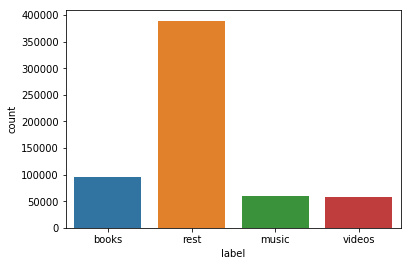

In [69]:
sns.countplot(df['label']) #visualizing the distribution of label data

In [70]:
sum(df['storeId'].isnull()) #Check missing values in storeId

389250

In [73]:
df[df['storeId'].isnull()]['label'].nunique() #Check number of unique labels for all the missing store ids

1

In [47]:
df_t.head(5)

,storeId,url,additionalAttributes,breadcrumbs,id
0,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,8589934592
1,NaN,NaN,NaN,online shopping > home & garden > art gal...,8589934593
2,NaN,NaN,NaN,home goods > kitchen & dining > table linens &...,8589934594
3,NaN,NaN,NaN,11320,8589934595
4,NaN,NaN,NaN,tools & home improvement > kitchen & bath fixt...,8589934596


In [11]:
df['textdata'] = df['additionalAttributes'].fillna('')+df['breadcrumbs'].fillna('') #Concatenating additional attributes and breadcrumbs column and forming a new column which would be used for analysis

In [12]:
df_t['textdata'] = df_t['additionalAttributes'].fillna('')+df_t['breadcrumbs'].fillna('') # Performing the same step above for test data set

In [50]:
df.head(5) #After adding new column

,storeId,url,additionalAttributes,breadcrumbs,label,textdata
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books,Contributed by=Toto;Format=Paperback;Number of...
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest,best buy > computers & tablets > computer card...
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music,Performer=Cult Of Youth;Record Label=Vinyl;1.=...
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books,Format=Paperback;Copyright Year=2000;Publisher...
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music,Store Item Number (DPCI)=244-48-2721;Origin=Ma...


In [51]:
df_t.head(5)

,storeId,url,additionalAttributes,breadcrumbs,id,textdata
0,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,8589934592,baby products > bathing & skin care > washclot...
1,NaN,NaN,NaN,online shopping > home & garden > art gal...,8589934593,online shopping > home & garden > art gal...
2,NaN,NaN,NaN,home goods > kitchen & dining > table linens &...,8589934594,home goods > kitchen & dining > table linens &...
3,NaN,NaN,NaN,11320,8589934595,11320
4,NaN,NaN,NaN,tools & home improvement > kitchen & bath fixt...,8589934596,tools & home improvement > kitchen & bath fixt...


In [52]:
df.groupby('label').describe()

additionalAttributes         \
                      count unique   
label                                
books                 95811  94689   
music                 59996  50560   
rest                      0      0   
videos                58144  54496   

                                                               breadcrumbs  \
                                                      top freq       count   
label                                                                        
books   Format=Record book;Series Name=Grow a Thousand...   86       92409   
music                                    edition=Audio CD  274       59996   
rest                                                  NaN  NaN      389250   
videos                    Country of Origin=United States  398       58144   

                                                                         \
       unique                                                top   freq   
label                                                                     
books   19168                                              books  16039   
music    4853                                              music  16000   
rest    32762   home  >  decor  >  curtains & window treatmen...  13703   
videos   6342    target > movies, music & books > movies > drama   3094   

       storeId                    textdata         \
         count unique  top   freq    count unique   
label                                               
books    95811     18   22  16000    95811  94719   
music    59996     93   22  16000    59996  50951   
rest         0      0  NaN    NaN   389250  32762   
videos   58144     65   22  16000    58144  54735   

                                                                    url  \
                                                      top   freq  count   
label                                                                     
books   Format=Record book;Series Name=Grow a Thousand...     86  95811   
music   Performer=Various Artists;1.=Track Listing Not...     16  59996   
rest     home  >  decor  >  curtains & window treatmen...  13703      0   
videos  Country of Origin=United Statesbooks & media >...     75  58144   

                                                                       
       unique                                                top freq  
label                                                                  
books   94890  https://www.barnesandnoble.com/w/little-women-...    4  
music   50894  https://www.walmart.com/ip/Golden-Suits-Dlcd-O...    6  
rest        0                                                NaN  NaN  
videos  55728  https://www.walmart.com/ip/Mr.-Brooks-Blu-ray-...    4

In [53]:
sum(df['textdata'].isnull()) #Check for missing values

0

In [54]:
sum(df_t['textdata'].isnull()) #Check for missing values

0

In [8]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
#We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. 
#This will allow us to set up all the transformations that we will do to the data for future use

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [13]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['textdata'], df['label'], test_size=0.4)


In [20]:
pipeline.fit(df.textdata,df.label) #Train the algorithm 

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000001E4C7C8598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [14]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000003B5C89D90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [15]:
pred_label = pipeline.predict(msg_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(pred_label,label_test))

             precision    recall  f1-score   support

      books       1.00      1.00      1.00     38506
      music       0.96      1.00      0.98     22920
       rest       1.00      0.99      1.00    156404
     videos       1.00      0.99      1.00     23451

avg / total       1.00      1.00      1.00    241281



In [22]:
predicted_label = pipeline.predict(df_t.textdata) #Predict data on test data based on the model obtained above

In [55]:
df_t['PredictedLabel'] = predicted_label #Add the predicted values to the original test data set

In [58]:
df_t.groupby('PredictedLabel').count()['textdata'] #Distribution of label data

PredictedLabel
books      23997
music      14592
rest      388856
videos     14596
Name: textdata, dtype: int64

In [74]:
df_t.to_csv('submissions.csv',index=False) # Write dataframe to csv file and set index as False to avoid unnecessary column

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------